In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥1.0.2 is required
import sklearn
assert sklearn.__version__ >= "1.0.2"

# Common imports
import numpy as np
import os
import pandas as pd
import time

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=22)


# Load and process data

In [3]:
# read data from csv file
trainset = pd.read_csv('trainset.csv')
testset = pd.read_csv('testset.csv')
print(trainset.shape)
print(testset.shape)

(400000, 15)
(100000, 15)


In [4]:
trainset

,0_Ca,0_Cl,0_Na,0_K,0_N5,1_Ca,1_Cl,1_Na,1_K,1_N5,out_Ca,out_Cl,out_Na,out_K,out_N5
0,0.277630,0.000000,0.721418,1.467946,0.829808,0.144883,0.148850,0.000000,0.610012,0.005512,0.31360,0.0000,0.705300,1.41200,0.8298
1,0.836556,0.333160,0.980700,1.285543,0.000000,0.000000,0.000000,1.171364,0.000000,0.000000,0.37060,0.3332,2.037000,1.16100,0.0000
2,0.000000,0.000000,0.654695,0.000000,0.616879,1.024158,0.286779,0.000000,0.972109,0.783855,0.01318,0.0000,0.586900,0.04144,0.6169
3,0.546309,0.719579,0.445756,0.505593,1.490291,1.106561,1.026543,0.604889,1.232017,1.464654,0.53200,0.7196,0.445200,0.53480,1.4900
4,1.240588,0.000000,0.000000,1.440491,0.264469,0.000000,0.973963,0.000000,0.530073,0.000000,0.77790,0.0000,0.000000,2.36600,0.2645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0.521131,0.000000,0.000000,0.594353,1.337039,0.497137,0.000000,0.056170,0.960085,1.245928,0.50490,0.0000,0.001042,0.62570,1.3370
399996,0.000000,1.454111,0.278071,1.039382,0.764709,0.000000,0.005023,1.181833,0.338544,0.000000,0.00000,1.4540,0.580300,0.73710,0.7647
399997,1.161505,0.000000,0.535203,0.660030,0.875334,0.000000,0.000000,0.975760,0.000000,0.000000,0.65070,0.0000,1.608000,0.60870,0.8753
399998,0.926681,0.000000,0.862568,0.626765,0.000000,1.175990,1.319211,0.000000,1.290201,0.000000,0.91620,0.0000,0.850400,0.65990,0.0000


In [5]:
trainset['out_Ca_dif'] = trainset['out_Ca']-trainset['0_Ca']
trainset['out_Na_dif'] = trainset['out_Na']-trainset['0_Na']
trainset['out_K_dif'] = trainset['out_K']-trainset['0_K']

In [6]:
testset['out_Ca_dif'] = testset['out_Ca']-testset['0_Ca']
testset['out_Na_dif'] = testset['out_Na']-testset['0_Na']
testset['out_K_dif'] = testset['out_K']-testset['0_K']

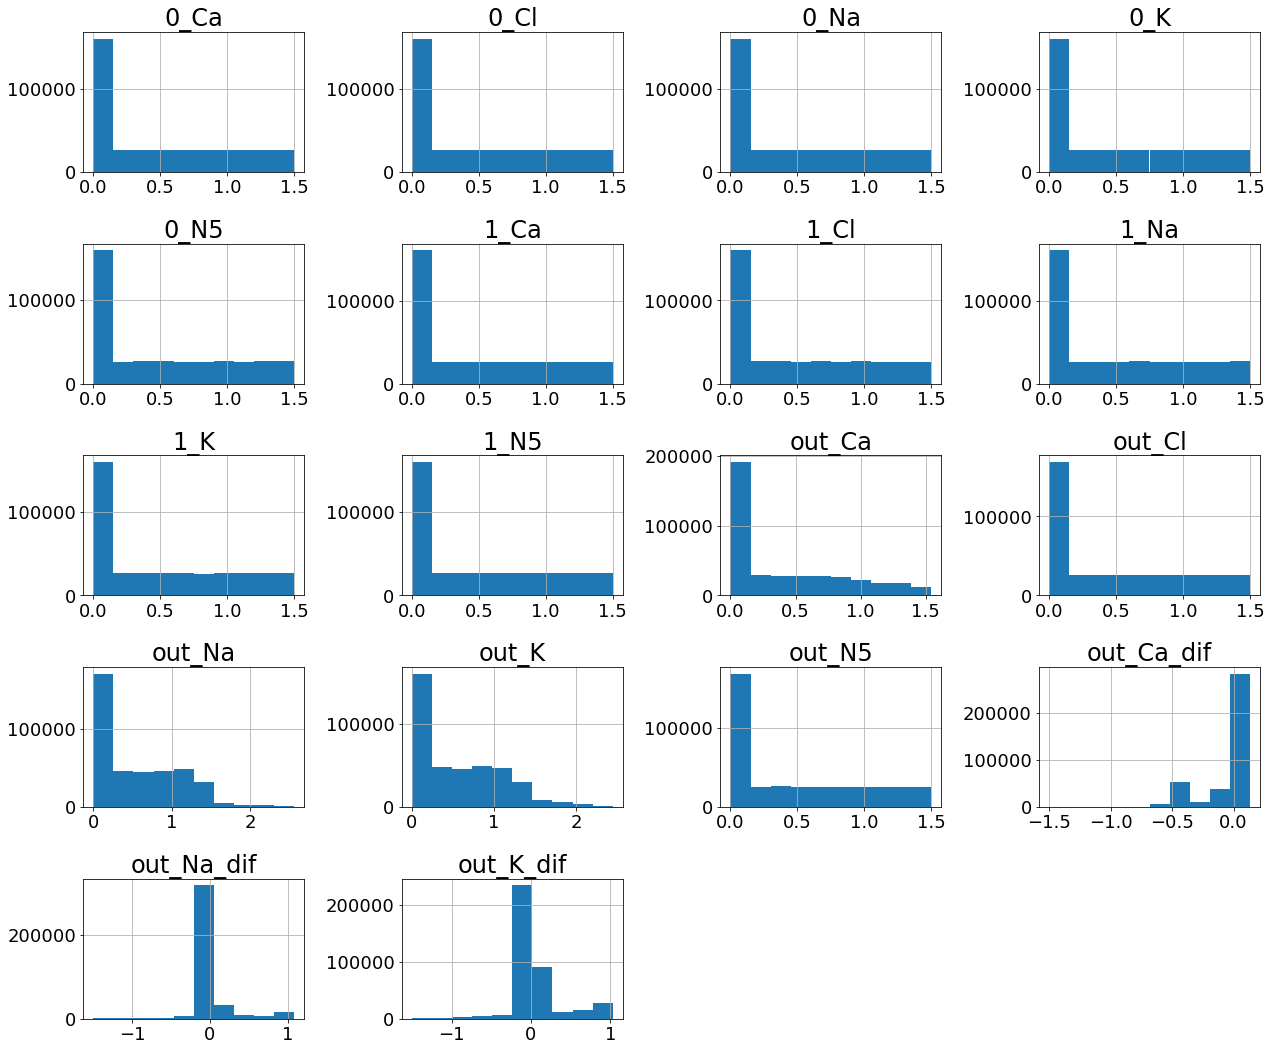

In [7]:
trainset.hist(figsize=(18, 15));
plt.tight_layout()

In [8]:
# split x and y
X_train = trainset.iloc[:, [0,2,3,5,7,8]].values 
y_train = trainset.iloc[:, [15, 16, 17]].values
X_test = testset.iloc[:, [0,2,3,5,7,8]].values 
y_test = testset.iloc[:, [15, 16, 17]].values

# Name variables
inputs = [list(trainset)[i] for i in [0,2,3,5,7,8]] 
outputs = [list(trainset)[i] for i in [15, 16, 17]] # do not work for list -> list(trainset)[10, 12, 13]

In [9]:
print('Inputs: ', inputs)
print('Outputs: ', outputs)
print('X_train instances: ', X_train.shape)
print('X_test instances: ', X_test.shape)
print('y_train instances: ', y_train.shape)
print('y_test instances: ', y_test.shape)

Inputs:  ['0_Ca', '0_Na', '0_K', '1_Ca', '1_Na', '1_K']
Outputs:  ['out_Ca_dif', 'out_Na_dif', 'out_K_dif']
X_train instances:  (400000, 6)
X_test instances:  (100000, 6)
y_train instances:  (400000, 3)
y_test instances:  (100000, 3)


## Normalize data

In [10]:
# Normalize data for checking
min_ = np.array([2.40311919e-05, 4.88878123e-07, 2.50729397e-06, 1.07587663e-06, 7.33135675e-06, 1.21962831e-05])
max_ = np.array([1.49997587, 1.49999182, 1.49999116, 1.49997541, 1.49999112, 1.49998768])
#min_ = X_train.min(axis=0)
#max_ = X_train.max(axis=0)
X_train_norm = ((X_train - min_)/(max_-min_))*2 -1 
X_test_norm = ((X_test - min_)/(max_-min_))*2 -1

print("min:\n", min_)
print("\nmax:\n", max_)

min:
 [2.40311919e-05 4.88878123e-07 2.50729397e-06 1.07587663e-06
 7.33135675e-06 1.21962831e-05]

max:
 [1.49997587 1.49999182 1.49999116 1.49997541 1.49999112 1.49998768]


In [11]:
min_

array([2.40311919e-05, 4.88878123e-07, 2.50729397e-06, 1.07587663e-06,
       7.33135675e-06, 1.21962831e-05])

In [12]:
max_

array([1.49997587, 1.49999182, 1.49999116, 1.49997541, 1.49999112,
       1.49998768])

## XGB

In [13]:
import xgboost as xgb

reg_best = xgb.XGBRegressor(objective='reg:squarederror', 
                             colsample_bytree= 1.0, 
                             learning_rate= 0.05, 
                             max_depth= 10, 
                             n_estimators= 500, 
                             reg_lambda= 10,
                             subsample= 0.2,
                             n_jobs=-1, 
                             random_state=42)
start = time.time()
reg_best.fit(X_train_norm, y_train)
print("Run time = ", time.time()-start)

Run time =  895.3237402439117


In [14]:
xgb_model = reg_best.get_booster() 
num_round = reg_best.get_num_boosting_rounds()
param = reg_best.get_xgb_params()
print(num_round)
print(param)

500
{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1.0, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'interaction_constraints': '', 'learning_rate': 0.05, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 10, 'max_leaves': 0, 'min_child_weight': 1, 'monotone_constraints': '()', 'n_jobs': -1, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 10, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 0.2, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [15]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [16]:
xgb_model.save_model("XGBmodel_concat_delta.bin")
#xgb_model_retrained.save_model("XGBmodel.bin")

In [17]:
start = time.time()

xgb_loaded = xgb.Booster({'nthread': 1})  # init model
xgb_loaded.load_model('XGBmodel_concat_delta.bin')  # load model

end = time.time()
print("time = ", end - start)
print()

time =  0.06714081764221191



In [18]:
dtrain_norm = xgb.DMatrix(X_train_norm, label=y_train)
dtest_norm = xgb.DMatrix(X_test_norm, label=y_test)

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('rmse: ', np.sqrt(mean_squared_error(y_test, xgb_loaded.predict(dtest_norm))))

rmse:  0.004280719323496461


In [20]:
sorted(zip(reg_best.feature_importances_, inputs), reverse=True)

[(0.35581085, '1_Ca'),
 (0.22589642, '0_Ca'),
 (0.21388581, '1_K'),
 (0.10115903, '1_Na'),
 (0.052529708, '0_Na'),
 (0.050718155, '0_K')]

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

start = time.time()
y_train_pred = reg_best.predict(X_train_norm)
end = time.time()
print("time = ", start - end)
print()

mse = mean_squared_error(y_train, y_train_pred)
print('mse: ',mse)
rmse = np.sqrt(mse)
print('rmse: ',rmse)
mae = mean_absolute_error(y_train, y_train_pred)
print('mae: ',mae)

r2_model = r2_score(y_train, y_train_pred)
print('\nR2: ',r2_model)

time =  -1.6090221405029297

mse:  1.2614530952921593e-05
rmse:  0.003551694096191505
mae:  0.0013328034749151198

R2:  0.9998577342737035


In [22]:
start = time.time()
y_test_pred = reg_best.predict(X_test_norm)
end = time.time()
print("time = ", start - end)
print()

mse = mean_squared_error(y_test, y_test_pred)
print('mse: ',mse)
rmse = np.sqrt(mse)
print('rmse: ',rmse)
mae = mean_absolute_error(y_test, y_test_pred)
print('mae: ',mae)

r2_model = r2_score(y_test, y_test_pred)
print('\nR2: ',r2_model)

time =  -0.3759016990661621

mse:  1.8324557926555998e-05
rmse:  0.004280719323496461
mae:  0.0015130519913731362

R2:  0.9997897866352163


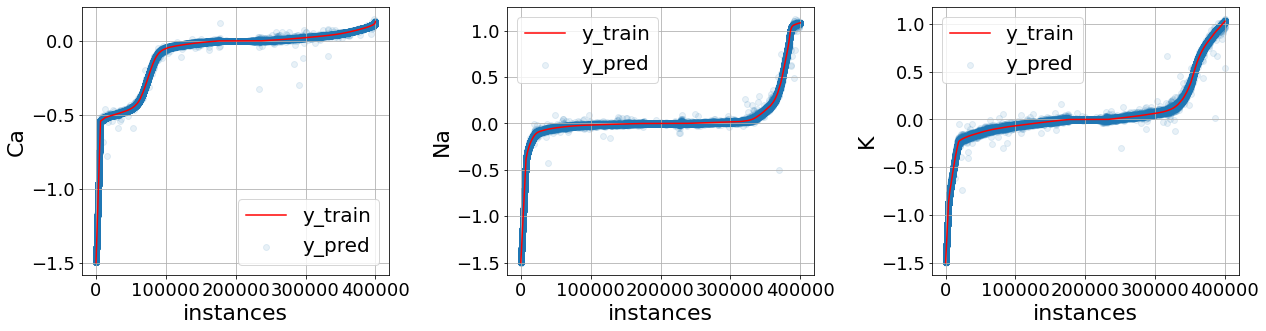

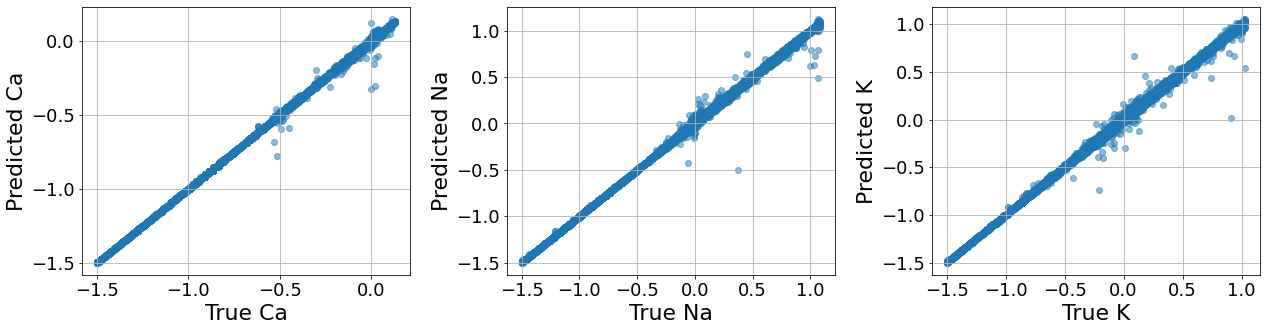

In [23]:
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=22)
fig, axes = plt.subplots(1,3, figsize=[18,5])

for i, ax in enumerate(axes.flat):
    aux_train = y_train[:,i]
    aux_pred = y_train_pred[:,i]
    index = np.argsort(aux_train)
    x = range(len(index))
    ax.plot(x, aux_train[index], 'r-')
    ax.scatter(x, aux_pred[index], alpha=0.1)
    ax.legend(['y_train', 'y_pred'])
    ax.set_xlabel('instances')
    ax.set_ylabel(outputs[i].split('_')[1])
    ax.grid()
plt.tight_layout()

print('\n\n')

fig, axes = plt.subplots(1,3, figsize=[18,5])

for i, ax in enumerate(axes.flat):
    ax.scatter(y_train[:,i], y_train_pred[:,i], alpha=0.5)
    ax.set_xlabel('True '+outputs[i].split('_')[1])
    ax.set_ylabel('Predicted '+outputs[i].split('_')[1])
    ax.grid()
plt.tight_layout()

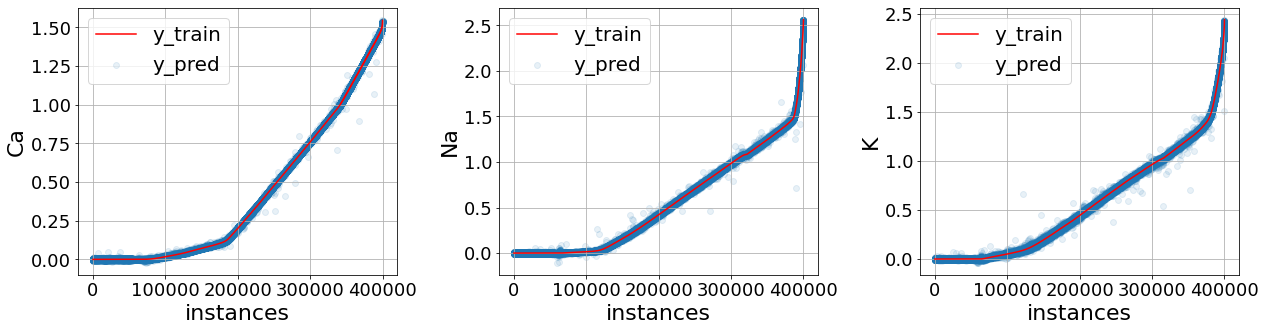

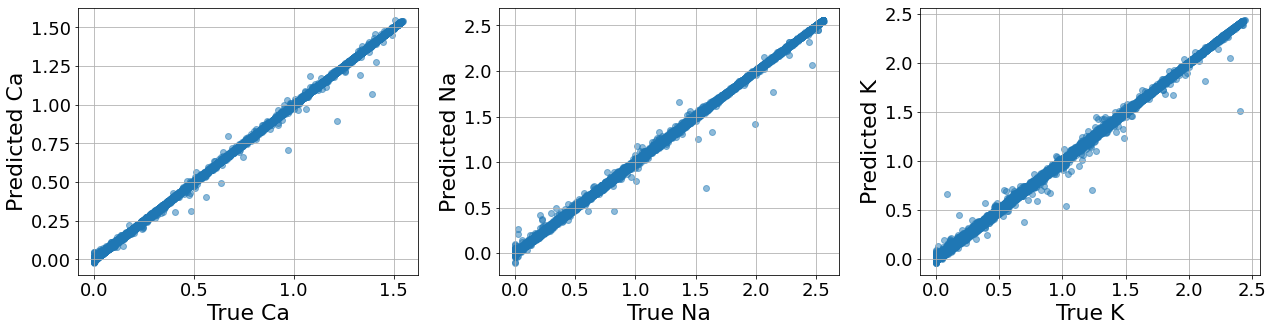

In [24]:
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=22)
fig, axes = plt.subplots(1,3, figsize=[18,5])

for i, ax in enumerate(axes.flat):
    aux_train = y_train[:,i]+X_train[:,i]
    aux_pred = y_train_pred[:,i]+X_train[:,i]
    index = np.argsort(aux_train)
    x = range(len(index))
    ax.plot(x, aux_train[index], 'r-')
    ax.scatter(x, aux_pred[index], alpha=0.1)
    ax.legend(['y_train', 'y_pred'])
    ax.set_xlabel('instances')
    ax.set_ylabel(outputs[i].split('_')[1])
    ax.grid()
plt.tight_layout()

print('\n\n')

fig, axes = plt.subplots(1,3, figsize=[18,5])

for i, ax in enumerate(axes.flat):
    ax.scatter(y_train[:,i]+X_train[:,i], y_train_pred[:,i]+X_train[:,i], alpha=0.5)
    ax.set_xlabel('True '+outputs[i].split('_')[1])
    ax.set_ylabel('Predicted '+outputs[i].split('_')[1])
    ax.grid()
plt.tight_layout()

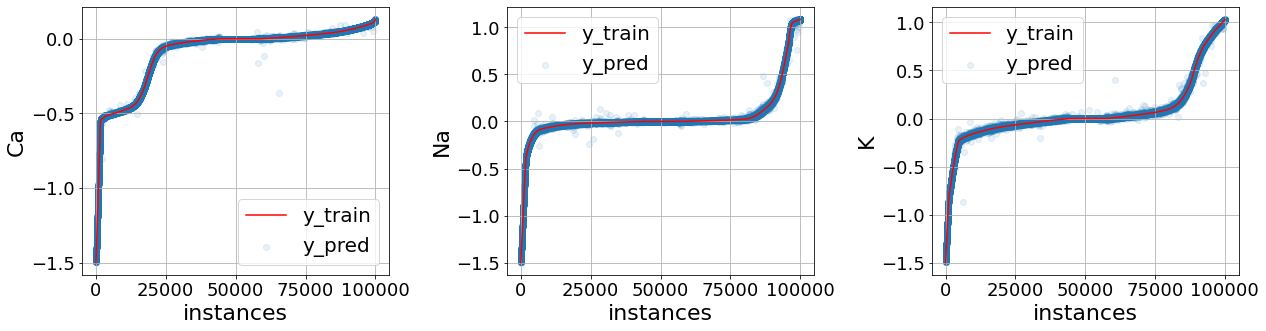

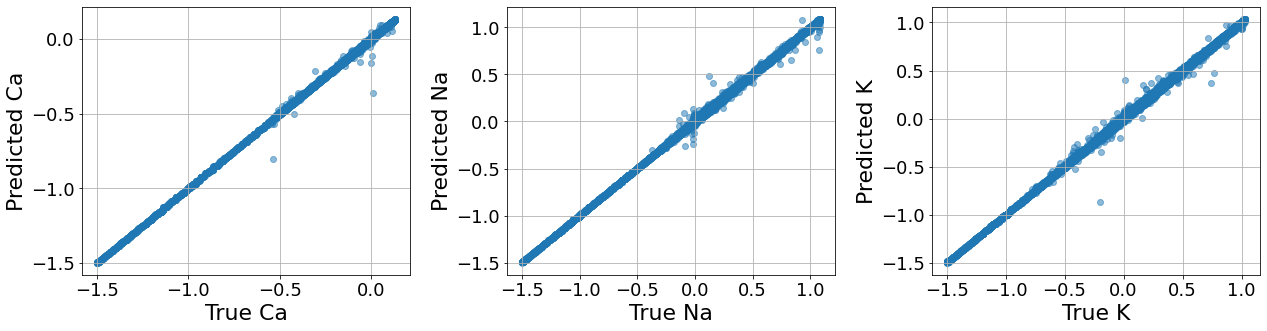

In [25]:
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=22)
fig, axes = plt.subplots(1,3, figsize=[18,5])

for i, ax in enumerate(axes.flat):
    aux_train = y_test[:,i]
    aux_pred = y_test_pred[:,i]
    index = np.argsort(aux_train)
    x = range(len(index))
    ax.plot(x, aux_train[index], 'r-')
    ax.scatter(x, aux_pred[index], alpha=0.1)
    ax.legend(['y_train', 'y_pred'])
    ax.set_xlabel('instances')
    ax.set_ylabel(outputs[i].split('_')[1])
    ax.grid()
plt.tight_layout()

print('\n\n')

fig, axes = plt.subplots(1,3, figsize=[18,5])

for i, ax in enumerate(axes.flat):
    ax.scatter(y_test[:,i], y_test_pred[:,i], alpha=0.5)
    ax.set_xlabel('True '+outputs[i].split('_')[1])
    ax.set_ylabel('Predicted '+outputs[i].split('_')[1])
    ax.grid()
plt.tight_layout()

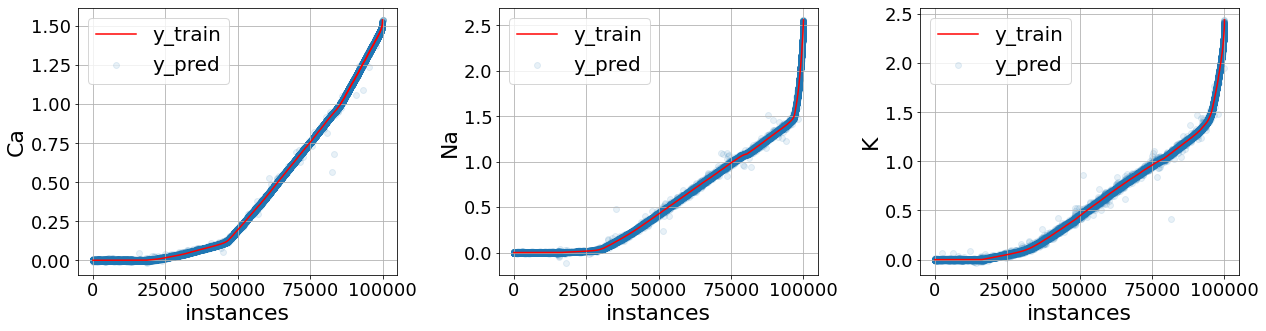

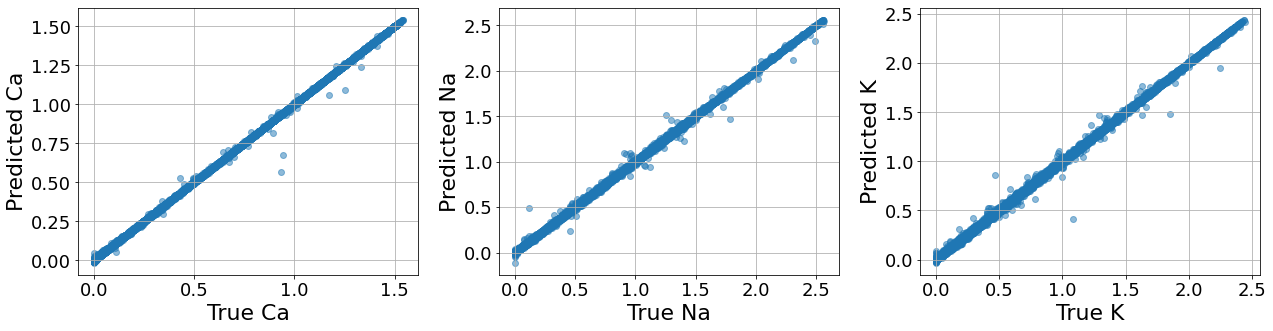

In [26]:
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=22)
fig, axes = plt.subplots(1,3, figsize=[18,5])

for i, ax in enumerate(axes.flat):
    aux_train = y_test[:,i]+X_test[:,i]
    aux_pred = y_test_pred[:,i]+X_test[:,i]
    index = np.argsort(aux_train)
    x = range(len(index))
    ax.plot(x, aux_train[index], 'r-')
    ax.scatter(x, aux_pred[index], alpha=0.1)
    ax.legend(['y_train', 'y_pred'])
    ax.set_xlabel('instances')
    ax.set_ylabel(outputs[i].split('_')[1])
    ax.grid()
plt.tight_layout()

print('\n\n')

fig, axes = plt.subplots(1,3, figsize=[18,5])

for i, ax in enumerate(axes.flat):
    ax.scatter(y_test[:,i]+X_test[:,i], y_test_pred[:,i]+X_test[:,i], alpha=0.5)
    ax.set_xlabel('True '+outputs[i].split('_')[1])
    ax.set_ylabel('Predicted '+outputs[i].split('_')[1])
    ax.grid()
plt.tight_layout()

## Checking charge constraint

In [27]:
charge_in = 2*X_train[:, 0]+X_train[:, 1]+X_train[:, 2]
charge_out = 2*y_train_pred[:, 0]+y_train_pred[:, 1]+y_train_pred[:, 2]+2*X_train[:, 0]+X_train[:, 1]+X_train[:, 2]

mean_absolute_error(charge_in, charge_out)  

0.07689455670578427

In [28]:
charge_in = 2*X_test[:, 0]+X_test[:, 1]+X_test[:, 2]
charge_out = 2*y_test_pred[:, 0]+y_test_pred[:, 1]+y_test_pred[:, 2]+2*X_test[:, 0]+X_test[:, 1]+X_test[:, 2]

mean_absolute_error(charge_in, charge_out)  

0.07717232217122605

## Run time

In [29]:
start = time.time()
for i in range(1000):  
    reg_best.predict(X_test_norm[0:1])
end = time.time()
print("time = ", (start - end)/1000)
print(reg_best.predict(X_test_norm[0:1]))

time =  -0.0014493327140808105
[[-0.0297462   0.01524391  0.04511995]]


In [30]:
dtest_1 = xgb.DMatrix(X_test_norm[0:1])

In [31]:
start = time.time()
for i in range(1000):  
    xgb_model.predict(dtest_1)
end = time.time()
print("time = ", (start - end)/1000)
print(xgb_model.predict(dtest_1))

time =  -0.00014599180221557616
[[-0.0297462   0.01524391  0.04511995]]


In [32]:
start = time.time()
for i in range(1000):  
    xgb_loaded.predict(dtest_1)
end = time.time()
print("time = ", (start - end)/1000)
print(xgb_loaded.predict(dtest_1))

time =  -7.916665077209472e-05
[[-0.0297462   0.01524391  0.04511995]]


In [33]:
import xgboost as xgb
xgb.__version__

'1.6.0-dev'

## Input test

In [34]:
X_test[0:1][0]

array([1.25756171, 0.        , 1.07682544, 0.49220375, 0.86364708,
       1.187033  ])

In [35]:
input_xgb = X_test[0:1][0]
input_norm = (input_xgb - min_)*2/(max_-min_) -1
print(input_norm)
print(X_test_norm[0:1])

[ 0.67677075 -1.00000065  0.43577478 -0.34371853  0.15153211  0.58272027]
[[ 0.67677075 -1.00000065  0.43577478 -0.34371853  0.15153211  0.58272027]]


In [36]:
dtinput = xgb.DMatrix([input_norm])
print(xgb_loaded.predict(dtinput))
print(xgb_loaded.predict(dtinput)+X_test[0:1,:3])

[[-0.0297462   0.01524391  0.04511995]]
[[1.22781551 0.01524391 1.12194539]]


In [37]:
print(y_test[0:1])
print(y_test[0:1]+X_test[0:1,:3])

[[-0.02956171  0.0161      0.04317456]]
[[1.228  0.0161 1.12  ]]
